In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns


In [2]:
con = sqlite3.connect("../laliga.sqlite")
df = pd.read_sql_query("SELECT * from Matches", con)


In [3]:
df.head()

season  division  matchday     date  time    home_team        away_team  \
0  1928-1929         1         1  2/10/29  None  Arenas Club  Athletic Madrid   
1  1928-1929         1         1  2/10/29  None     Espanyol       Real Unión   
2  1928-1929         1         1  2/10/29  None  Real Madrid        Catalunya   
3  1928-1929         1         1  2/10/29  None     Donostia         Athletic   
4  1928-1929         1         1  2/12/29  None       Racing        Barcelona   

  score  
0   2:3  
1   3:2  
2   5:0  
3   1:1  
4   0:2

## Exercise 1
Extract the result from the score: Giving 1 if the home team won, 2 if the away team won and X if it was a tie

In [4]:
def get_result(score: str):
    if score is None:
        return None
    goals = list(map(int, score.split(":")))
    if goals[0] > goals[1]:
        return "1"
    elif goals[1] > goals[0]:
        return "2"
    else:
        return "X"


In [5]:
df["result"] = df["score"].apply(get_result)
df["result"] = df["result"].map(str)


In [6]:
df.head()

season  division  matchday     date  time    home_team        away_team  \
0  1928-1929         1         1  2/10/29  None  Arenas Club  Athletic Madrid   
1  1928-1929         1         1  2/10/29  None     Espanyol       Real Unión   
2  1928-1929         1         1  2/10/29  None  Real Madrid        Catalunya   
3  1928-1929         1         1  2/10/29  None     Donostia         Athletic   
4  1928-1929         1         1  2/12/29  None       Racing        Barcelona   

  score result  
0   2:3      2  
1   3:2      1  
2   5:0      1  
3   1:1      X  
4   0:2      2

In [7]:
df_past = df.loc[df["season"] != "2021-2022"].copy()


<AxesSubplot:ylabel='result'>

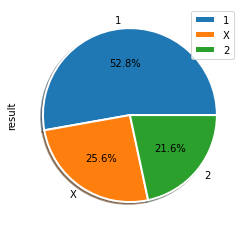

In [8]:
df_past["result"].value_counts().plot.pie(
    autopct="%1.1f%%",
    shadow=True,
    wedgeprops={"linewidth": 2, "edgecolor": "white"},
    legend=True,
)


We see that it is indeed true that the home time is most likely to win.

## Exercise 2
### Most goals scored/conceded

In [9]:
def get_goals(score: str, home_away: int):
    if score is None:
        return None
    goals = list(map(int, score.split(":")))
    return goals[home_away]


In [10]:
df["home_goals"] = df["score"].apply(get_goals, args=(0,))
df["away_goals"] = df["score"].apply(get_goals, args=(1,))
df.head()


season  division  matchday     date  time    home_team        away_team  \
0  1928-1929         1         1  2/10/29  None  Arenas Club  Athletic Madrid   
1  1928-1929         1         1  2/10/29  None     Espanyol       Real Unión   
2  1928-1929         1         1  2/10/29  None  Real Madrid        Catalunya   
3  1928-1929         1         1  2/10/29  None     Donostia         Athletic   
4  1928-1929         1         1  2/12/29  None       Racing        Barcelona   

  score result  home_goals  away_goals  
0   2:3      2         2.0         3.0  
1   3:2      1         3.0         2.0  
2   5:0      1         5.0         0.0  
3   1:1      X         1.0         1.0  
4   0:2      2         0.0         2.0

In [11]:
goals_scored = (
    df.loc[df["division"] == 1].groupby("home_team").sum()["home_goals"]
    + df.loc[df["division"] == 1].groupby("away_team").sum()["away_goals"]
)
goals_conceded = (
    df.loc[df["division"] == 1].groupby("home_team").sum()["away_goals"]
    + df.loc[df["division"] == 1].groupby("away_team").sum()["home_goals"]
)


c:\Users\parap\Qsync\Uni\Module\Master\3_Semester\Research and Innovation\01_Introduction to Python\la-quiniela\.venv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:title={'center':'Goals conceded'}, xlabel='Team'>

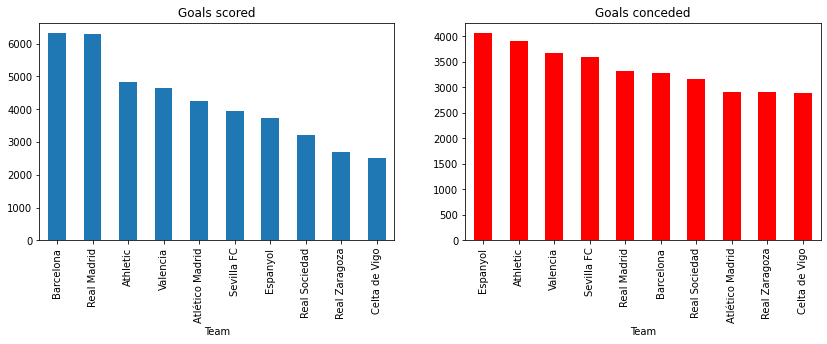

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
goals_scored.sort_values(ascending=False).head(10).plot.bar(
    ax=ax[0], title="Goals scored", xlabel="Team"
)
goals_conceded.sort_values(ascending=False).head(10).plot.bar(
    ax=ax[1], color="red", title="Goals conceded", xlabel="Team"
)


### Biggest wins

In [13]:
df["abs_goal_diff"] = abs(df["home_goals"] - df["away_goals"])
df["max_goals"] = df[["home_goals", "away_goals"]].max(axis=1)


In [14]:
df.loc[df["division"] == 1].sort_values(
    by=["abs_goal_diff", "max_goals"], ascending=False
).head(10)[["date", "home_team", "away_team", "score"]].reset_index(drop=True)


date       home_team      away_team score
0    2/8/31        Athletic      Barcelona  12:1
1   9/29/40      Sevilla FC      Barcelona  11:1
2   9/28/41      Sevilla FC    Real Oviedo  10:0
3   1/11/42        Athletic  Celta de Vigo  10:0
4  11/19/50        Athletic         Lérida  10:0
5    2/7/60     Real Madrid       Elche CF  11:2
6   9/11/49       Barcelona      Gimnàstic  10:1
7  10/23/49   Celta de Vigo      Gimnàstic  10:1
8   11/5/50  Dep. La Coruña         Lérida  10:1
9   9/23/51        Athletic  Real Zaragoza  10:1

## Exercise 3

c:\Users\parap\Qsync\Uni\Module\Master\3_Semester\Research and Innovation\01_Introduction to Python\la-quiniela\.venv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
c:\Users\parap\Qsync\Uni\Module\Master\3_Semester\Research and Innovation\01_Introduction to Python\la-quiniela\.venv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


Text(0.5, 0.98, 'Matches played each weekday')

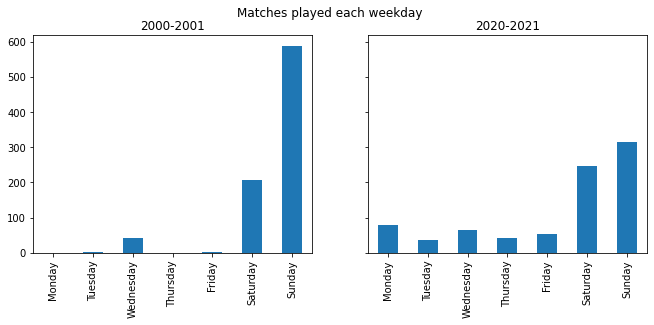

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(11, 4), sharey=True)
for i, season in enumerate(["2000-2001", "2020-2021"]):
    datetime_dates = pd.to_datetime(df.loc[df["season"] == season, "date"])
    datetime_dates[datetime_dates.dt.year >= 2023] -= pd.DateOffset(years=100)
    weekdays = datetime_dates.dt.day_name()
    days = [
        "Monday",
        "Tuesday",
        "Wednesday",
        "Thursday",
        "Friday",
        "Saturday",
        "Sunday",
    ]
    weekdays_count = weekdays.value_counts()
    all_weekdays = pd.Series([0 for _ in days], index=days)
    weekdays_count = weekdays_count.add(all_weekdays, fill_value=0)
    weekdays_count[days].plot.bar(ax=axs[i], title=season)
plt.suptitle("Matches played each weekday")


We see that in 2000-2001 nearly all games were played on Saturday and Sunday with a small amount of matches on Wednesday. In 2020-2021, the matches are far more divided over the weekdays with a considerable amount of matches played on work days. Thus, the games schedule changed a lot in the last 20 years.

c:\Users\parap\Qsync\Uni\Module\Master\3_Semester\Research and Innovation\01_Introduction to Python\la-quiniela\.venv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
c:\Users\parap\Qsync\Uni\Module\Master\3_Semester\Research and Innovation\01_Introduction to Python\la-quiniela\.venv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


Text(0.5, 0.98, 'Distribution kick-off time')

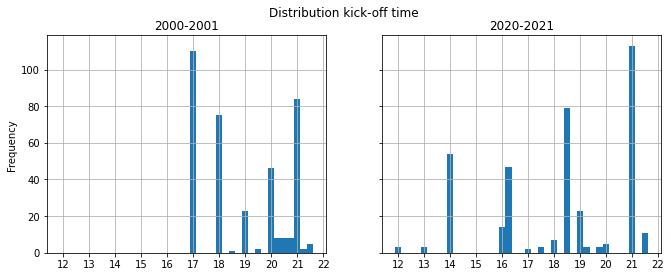

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(11, 4), sharey=True)
for i, season in enumerate(["2000-2001", "2020-2021"]):
    datetime_times = pd.to_datetime(
        df.loc[((df["season"] == season) & (df["division"] == 1)), "time"]
    )
    times = datetime_times.dt.hour + datetime_times.dt.minute / 60
    times.plot.hist(
        ax=axs[i],
        title=season,
        bins=np.linspace(12, 22, 40, endpoint=False),
        grid=True,
        align="left",
    )
    axs[i].set_xticks(np.arange(12, 23))
plt.suptitle("Distribution kick-off time")


For the comparison of the kick-off times, we only look at the games in the first division, because the data for the kick-off time in the 2nd division for the 2000-2001 season is missing.

We see that also the distribution of the kick-off times changed. Not only were many more different kick-off times intodruced, they also are not concentrated between 17:00 and 18:00 but moved more to earlier and later times.

## Exercise 4

In [17]:
def plot_cross_results_table(season):

    df_cross = df[(df.division == 1) & (df["season"] == season)].copy()
    df_cross["goals_diff"] = df.home_goals - df.away_goals

    labels = list()
    scores = list()
    i = 0
    names = df_cross["home_team"].drop_duplicates().sort_values().values.tolist()
    for name in names:
        labels.append(name[0:3])
        W = df_cross[df_cross["home_team"] == name][["away_team", "score"]]
        W = W.sort_values("away_team")
        g = W["score"].values.tolist()
        g.insert(i, "0")

        scores.append(g)
        i = i + 1

    scores = np.array(scores)
    scores.reshape(len(names), len(names))

    p_table = df_cross.pivot_table(
        index="home_team", columns="away_team", values="goals_diff", aggfunc="mean"
    )
    fig, ax = plt.subplots(figsize=(13, 6))
    sns.heatmap(
        p_table,
        annot=scores,
        fmt="",
        cmap="RdYlGn",
        cbar=False,
        linewidths=0.05,
        linecolor="grey",
        ax=ax,
    )
    ax.xaxis.tick_top()  # x axis on top
    ax.xaxis.set_label_position("top")
    ax.set_xticklabels(labels)
    ax.tick_params(left=False, top=False)
    plt.xlabel("")
    plt.ylabel("")
    plt.show()

    return


In [18]:
plot_cross_results_table("2020-2021")


## Exercise 5

In [19]:
def plot_direct_confrontations_stats(team1: str, team2: str):
    df_home_team1 = df.loc[(df['home_team']==team1) & (df['away_team']==team2) & (df['season']!='2021-2022')].copy()
    df_home_team2 = df.loc[(df['home_team']==team2) & (df['away_team']==team1) & (df['season']!='2021-2022')].copy()
    df_both = pd.concat([df_home_team1, df_home_team2]).groupby('home_team').sum()

    df_goals = pd.Series([df_both.loc[team1, 'home_goals']+df_both.loc[team2, 'away_goals'],
                          df_both.loc[team1, 'away_goals']+df_both.loc[team2, 'home_goals']],
                          index=[team1, team2])
    df_home_team1.rename(columns={'home_goals': 'team1_goals', 'away_goals': 'team2_goals'}, inplace=True)
    df_home_team2.rename(columns={'home_goals': 'team2_goals', 'away_goals': 'team1_goals'}, inplace=True)

    df_home_team2['result'].replace({'1':'2', '2':'1'}, inplace=True)
    df_results = df_home_team1['result'].value_counts() + df_home_team2['result'].value_counts()

    fig, axs = plt.subplots(1, 2, figsize=(16,5))
    
    fig.suptitle('Rivalry between {} and {}'.format(team1,team2), fontsize = 24,y = 1.1)
    
    label_wins = ['{} wins'.format(team1) , '{} wins'.format(team2) , 'ties' ]
    label_goals = ['{} goals'.format(team1),'{} goals'.format(team2)]
    
    df_results.plot.pie(ax=axs[0],
                        autopct='%1.1f%%',
                        labels= label_wins, fontsize = 12,
                        shadow = True, wedgeprops = {'linewidth': 2, 'edgecolor': 'white'} ,
                        startangle = 30,
                        legend=False)
    axs[0].set_ylabel('')
    axs[0].legend(df_results , loc = "best")
    axs[0].axis('equal')
    df_goals.plot.pie(ax=axs[1], labels = label_goals, fontsize = 12,
                      autopct='%1.1f%%',
                      shadow = True, wedgeprops = {'linewidth': 2, 'edgecolor': 'white'},
                      legend=False)
    axs[1].legend(df_goals.astype(int), loc = "best")
    axs[1].set_ylabel('')
    axs[1].axis('equal')
    return axs

c:\Users\parap\Qsync\Uni\Module\Master\3_Semester\Research and Innovation\01_Introduction to Python\la-quiniela\.venv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
c:\Users\parap\Qsync\Uni\Module\Master\3_Semester\Research and Innovation\01_Introduction to Python\la-quiniela\.venv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

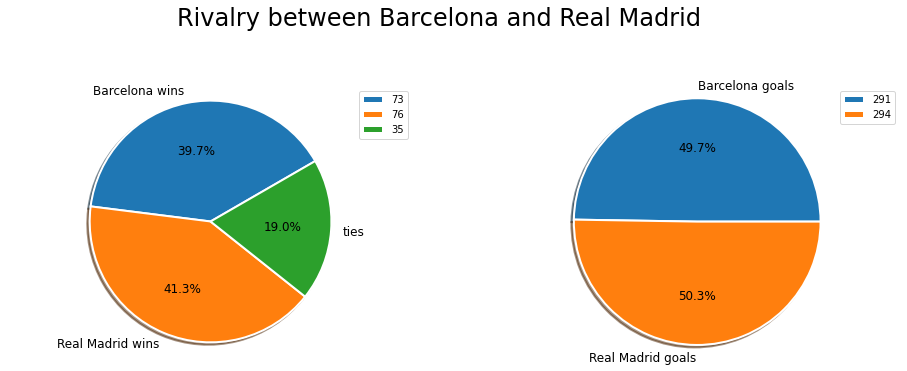

In [20]:
plot_direct_confrontations_stats("Barcelona", "Real Madrid")


The statistics between FC Barcelona and Real Madrid are very even, also the number of goals scored is nearly the same.

In [21]:
plot_direct_confrontations_stats("Real Betis", "Sevilla FC")


c:\Users\parap\Qsync\Uni\Module\Master\3_Semester\Research and Innovation\01_Introduction to Python\la-quiniela\.venv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
c:\Users\parap\Qsync\Uni\Module\Master\3_Semester\Research and Innovation\01_Introduction to Python\la-quiniela\.venv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

For Betis Sevilla and FC Sevilla this is not the case, FC Sevilla won many more games and scored the majority of the goals in the direct confrontations.

## Exercise 6

For each team, we get the games were they were the home and away team respectively. In these dataframes, we make a column if the team concerned lost this game. By calculating the length of the gaps between two losses, we get the number of undefeated games.

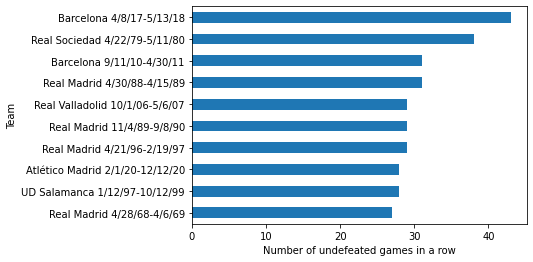

In [22]:
df_past = df.loc[df["season"] != "2021-2022"].copy()
df_past["home_goals"] = df_past["home_goals"].astype(int)
df_past["away_goals"] = df_past["away_goals"].astype(int)
teams = df_past["home_team"].drop_duplicates().reset_index(drop=True)
df_streaks = pd.DataFrame([], columns=["length", "team", "start", "end"])
for team in teams:
    df_home_team = df_past.loc[df["home_team"] == team].copy()
    df_home_team["team_lost"] = df_home_team["result"] == "2"
    df_away_team = df_past.loc[df["away_team"] == team].copy()
    df_away_team["team_lost"] = df_away_team["result"] == "1"
    df_team = (
        pd.concat([df_home_team, df_away_team]).sort_index().reset_index(drop=True)
    )
    lost = df_team.index[df_team["team_lost"]].to_numpy()
    streaks = list(
        zip(
            lost[1:] - lost[:-1] - 1,
            [team for _ in lost[1:]],
            df_team["date"].iloc[lost[:-1]],
            df_team["date"].iloc[lost[1:]],
        )
    )
    df_streaks = df_streaks.append(
        pd.DataFrame(streaks, columns=["length", "team", "start", "end"])
    )

df_streaks = df_streaks.sort_values(by="length", ascending=False).head(n=10)[::-1]
ax = df_streaks.plot.barh(x="team", y="length", legend=False)
ax.set_xlabel("Number of undefeated games in a row")
ax.set_ylabel("Team")
labels = df_streaks["team"] + " " + df_streaks["start"] + "-" + df_streaks["end"]
ax.set_yticklabels(labels)
plt.show()


The record for the longest undefeated streak is held by FC Barcelona and was set quite recently. It lasted over one year!

## Exercise 7

We calculate the home and away table at the end of each season seperately so that we can make use of the grouping and aggregating functions of `pandas`. In the end, the tables can just be added together.

In [23]:
dfs = []
for season in df_past['season'].drop_duplicates():
    for division in df_past.loc[(df_past['season']==season), 'division'].drop_duplicates():
        df_games = df_past.loc[(df_past['season']==season) & (df_past['division']==division)].copy()
        df_games['home_points'] = df_games['result'].replace({'1':3, 'X':1, '2':0})
        df_games['away_points'] = df_games['result'].replace({'1':0, 'X':1, '2':3})
        df_home = df_games.groupby('home_team').sum()[['home_goals', 'away_goals', 'home_points']].rename(columns={'home_goals':'GF', 'away_goals': 'GA', 'home_points': 'Pts'})
        df_away = df_games.groupby('away_team').sum()[['away_goals', 'home_goals', 'away_points']].rename(columns={'away_goals':'GF', 'home_goals': 'GA', 'away_points': 'Pts'})
        df_home_results = df_games.groupby('home_team')['result'].value_counts().rename('result_count').reset_index().pivot('home_team', 'result', 'result_count').rename(columns={'1':'W', 'X':'T', '2':'L'}).fillna(0)
        df_away_results = df_games.groupby('away_team')['result'].value_counts().rename('result_count').reset_index().pivot('away_team', 'result', 'result_count').rename(columns={'1':'L', 'X':'T', '2':'W'}).fillna(0)
        df_home = df_home.join(df_home_results)
        df_away = df_away.join(df_away_results)
        df_standings = df_home+df_away
        df_standings.insert(0, 'division', division)
        df_standings.insert(0, 'season', season)
        df_standings['GD'] = df_standings['GF'] - df_standings['GA']
        df_standings.sort_values(by=['Pts', 'GD', 'GF'], ascending=False, inplace=True)
        df_standings['rank'] = np.arange(1, len(df_standings)+1)
        df_standings = df_standings.reset_index().rename(columns={'home_team':'team'})[['season', 'division', 'rank', 'team', 'GF', 'GA', 'GD', 'W', 'L', 'T', 'Pts']]
        dfs.append(df_standings)
df_standings_all = pd.concat(dfs, ignore_index=True)
df_standings_all.to_excel('../reports/SeasonStandings.xlsx', index=False)

## Exercise 8

In [24]:
def plot_ranking_evolution(*args):
    seasons = [str(s1)+'-'+str(s2) for (s1, s2) in zip(np.arange(1926,2021), np.arange(1927, 2021))]
    df_standings = pd.read_excel('../reports/SeasonStandings.xlsx', engine='openpyxl')
    series = []
    for team in args:
        df_team_standings = df_standings.loc[df_standings['team']==team].copy().set_index('season')
        plot_rank = (df_team_standings['division']-1)*20 + df_team_standings['rank']
        plot_rank = plot_rank.reindex(seasons).rename(team)
        series.append(plot_rank)
    df_plot_ranks = pd.concat(series, axis=1)
    df_plot_ranks.plot.line(figsize=(12, 4), style='.-', legend=False).axhline(y=20.5, color='black')
    ax = plt.gca()
    ax.invert_yaxis()
    ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    ax.minorticks_on()
    ax.set_yticks([1, 6, 11, 16, 21, 26, 31, 36, 41])
    ax.set_yticklabels([1, 6, 11, 16, 1, 6, 11, 16, 21])
    ax.grid(True, which='both')
    return ax

In [25]:
plot_ranking_evolution("Villarreal")


<AxesSubplot:xlabel='season'>

These are the rankings of all Catalan teams which have played in the first division at least once:

In [26]:
plot_ranking_evolution('Barcelona', 'Espanyol', 'CE Sabadell', 'CE Europa', 'UE Lleida', 'CD Condal', 'Girona')

<AxesSubplot:xlabel='season'>

The rankings of all other Catalan teams in the data are shown here:

In [27]:
plot_ranking_evolution('Barcelona B', 'Reus Deportiu', 'Terrassa FC', 'CF Badalona', 'Llagostera', 'UE Figueres', 'Palamós CF', 'CE L\'Hospitalet', 'CFJ Mollerussa')

<AxesSubplot:xlabel='season'>

## Exercise 9

In [28]:
teams = df['home_team'].drop_duplicates()
all_changes = []
for team in teams:
    divisions = df.loc[((df['home_team']==team) | (df['away_team']==team)) & (df['matchday']==1)].sort_values(by='season')['division'].to_numpy()
    changes = sum(abs(divisions[1:]-divisions[:-1]))
    all_changes.append(changes)
df_changes = pd.Series(all_changes, index=teams)
df_changes.sort_values(ascending=False)

home_team
Dep. La Coruña    20
Racing            17
Celta de Vigo     17
Rayo Vallecano    15
Real Murcia       14
                  ..
Barcelona Atl.     0
Cartagena FC       0
Sestao River       0
Racing Ferrol      0
CF Badalona        0
Length: 152, dtype: int64

Deportivo La Coruña is the team that was relegated/promoted most with a total of 20 times.

<AxesSubplot:xlabel='season'>

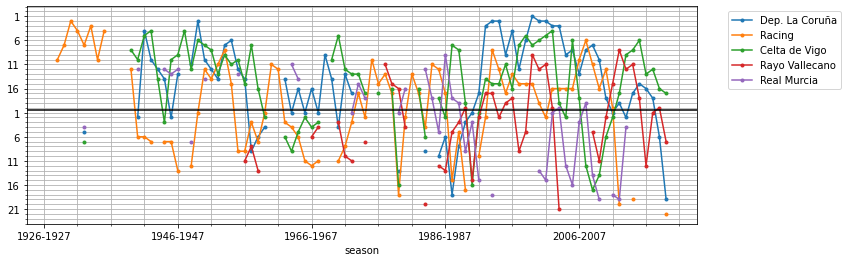

In [29]:
plot_ranking_evolution('Dep. La Coruña', 'Racing', 'Celta de Vigo', 'Rayo Vallecano', 'Real Murcia')

## Exercise 10

Because we are now interested in the results of the last 5 games for each team on each matchday, we have to solve this exercise with loops.

In [30]:
dfs = []
for season in df_past['season'].drop_duplicates():
    for division in df_past.loc[(df_past['season']==season), 'division'].drop_duplicates():
        df_games = df_past.loc[(df_past['season']==season) & (df_past['division']==division)]
        teams = df_games['home_team'].drop_duplicates().rename('team')
        init_data = [(season, division, 0, 0, 0, 0, 0, 0, 0, 0, []) for _ in teams]
        df_standings = pd.DataFrame(init_data, columns=['season', 'division', 'matchday', 'GF', 'GA', 'GD', 'W', 'L', 'T', 'Pts', 'last_5'], index=teams)
        last_5 = df_standings['last_5'].copy()
        for matchday in df_games['matchday'].drop_duplicates():
            df_standings['matchday'] += 1
            df_matchday = df_games.loc[df_games['matchday']==matchday]
            last_5 = df_standings['last_5'].apply(lambda x: x[:4])
            for i in df_matchday.index:
                game = df_matchday.loc[i, :]
                df_standings.loc[game['home_team'], 'GF'] += game['home_goals']
                df_standings.loc[game['home_team'], 'GA'] += game['away_goals']
                df_standings.loc[game['away_team'], 'GF'] += game['away_goals']
                df_standings.loc[game['away_team'], 'GA'] += game['home_goals']
                if game['result'] == '1':
                    df_standings.loc[game['home_team'], 'W'] += 1
                    df_standings.loc[game['home_team'], 'Pts'] += 3
                    df_standings.loc[game['away_team'], 'L'] += 1
                    last_5.loc[game['home_team']] = ["W"] + last_5.loc[game['home_team']]
                    last_5.loc[game['away_team']] = ["L"] + last_5.loc[game['away_team']]
                elif game['result'] == '2':
                    df_standings.loc[game['home_team'], 'L'] += 1
                    df_standings.loc[game['away_team'], 'W'] += 1
                    df_standings.loc[game['away_team'], 'Pts'] += 3
                    last_5.loc[game['home_team']] = ["L"] + last_5.loc[game['home_team']]
                    last_5.loc[game['away_team']] = ["W"] + last_5.loc[game['away_team']]
                else:
                    df_standings.loc[game['home_team'], 'T'] += 1
                    df_standings.loc[game['home_team'], 'Pts'] += 1
                    df_standings.loc[game['away_team'], 'T'] += 1
                    df_standings.loc[game['away_team'], 'Pts'] += 1
                    last_5.loc[game['home_team']] = ["T"] + last_5.loc[game['home_team']]
                    last_5.loc[game['away_team']] = ["T"] + last_5.loc[game['away_team']]
            df_standings['last_5'] = last_5
            df_standings['GD'] = (df_standings['GF'] - df_standings['GA']).astype(int)
            df_standings.sort_values(by=['Pts', 'GD', 'GF'], ascending=False, inplace=True)
            df_standings.reset_index(inplace=True)
            df_standings.insert(value=np.arange(1, len(df_standings)+1), loc=3, column='rank')
            dfs.append(df_standings[['season', 'division', 'matchday', 'rank', 'team', 'GF', 'GA', 'GD', 'W', 'L', 'T', 'Pts', 'last_5']].copy())
            df_standings.drop(columns=['rank'], inplace=True)
            df_standings.set_index(keys='team', drop=True, inplace=True)
df_standings_all_matchdays = pd.concat(dfs, ignore_index=True)
df_standings_all_matchdays.to_excel('../reports/MatchdayStandings.xlsx', index=False)
            